# Factor Model

In [229]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

/kaggle/input/atqs-data/factorpremiums.csv
/kaggle/input/atqs-data/return_data.csv


In [230]:
data = pd.read_csv("/kaggle/input/atqs-data/return_data.csv")

In [231]:
data.head(5)

,ID,date,Total Return,Specific Risk,20-Day ADV,Growth,Volatility,Profitability,Dividend Yield,Value,Market Sensitivity,Medium-Term Momentum,Short-Term Momentum,Liquidity
0,11JMZFSN8,1998-01-02,-0.060465,62.171901,7467336,0.610272,1.483404,-3.348269,-1.044360,-0.796163,0.742236,1.132275,-1.366586,1.432084
1,11JS8VT41,1998-01-02,0.000000,37.705799,4636298,1.044603,0.719389,0.154666,-1.044360,-0.074093,-0.014233,1.132102,-0.475880,0.305234
2,11NSZA7T1,1998-01-02,-0.003540,38.329513,3920738,-0.110977,1.101480,-0.405215,-1.044360,-3.246199,-0.743466,-0.328041,-1.200089,0.640464
3,122JHRL77,1998-01-02,-0.011834,25.069789,65048,-0.156014,-0.531706,-0.169127,0.406568,1.168001,-0.377473,1.274657,-0.091079,-0.118637
4,12ULRB8M7,1998-01-02,0.012552,41.183064,1436133,0.923330,0.358930,-0.023051,-1.044360,0.564086,0.025626,-1.219872,-1.785396,-0.688678


In [232]:
data.describe()

,Total Return,Specific Risk,20-Day ADV,Growth,Volatility,Profitability,Dividend Yield,Value,Market Sensitivity,Medium-Term Momentum,Short-Term Momentum,Liquidity
count,1.838160e+07,1.838160e+07,1.838160e+07,1.838160e+07,1.838160e+07,1.838160e+07,1.838160e+07,1.838160e+07,1.838160e+07,1.838160e+07,1.838160e+07,1.838160e+07
mean,7.366326e-04,3.889021e+01,3.960765e+07,-1.127751e-02,5.331335e-01,-3.526150e-01,-2.753682e-01,3.413628e-01,1.237269e-01,-7.116365e-02,-2.091740e-02,-3.814364e-02
std,2.578914e-01,2.764136e+01,1.625209e+08,9.997963e-01,8.458683e-01,9.356187e-01,1.214576e+00,9.397844e-01,9.921758e-01,9.973260e-01,9.996426e-01,9.991349e-01
min,-9.999925e-01,5.000000e+00,0.000000e+00,-4.876311e+00,-3.295292e+00,-3.672262e+00,-1.327632e+00,-4.476347e+00,-5.338249e+00,-3.736010e+00,-4.984918e+00,-5.171159e+00
25%,-1.251327e-02,2.051978e+01,1.139281e+06,-5.455478e-01,-4.371976e-02,-6.002014e-01,-1.076785e+00,-2.271907e-01,-5.463727e-01,-6.628975e-01,-5.222944e-01,-5.471946e-01
50%,0.000000e+00,3.119230e+01,5.392872e+06,-4.069956e-02,3.776152e-01,-2.373696e-01,-7.122272e-01,1.958128e-01,2.001965e-02,-1.792463e-01,-4.475792e-02,1.713075e-02
75%,1.250000e-02,4.830053e+01,2.423603e+07,5.129473e-01,9.439923e-01,1.586938e-01,8.704171e-02,7.451900e-01,6.848593e-01,3.504169e-01,4.448135e-01,5.712110e-01
max,9.990000e+02,2.232710e+02,1.742386e+10,4.560568e+00,4.934238e+00,3.232379e+00,5.500000e+00,4.618817e+00,5.325270e+00,4.986655e+00,4.867673e+00,5.220898e+00


## Plot the number of assets per date. 

In [233]:
# Convert "date" column to datetime format
data['date'] = pd.to_datetime(data['date'])
assets_per_date = data.groupby(["date"]).size()

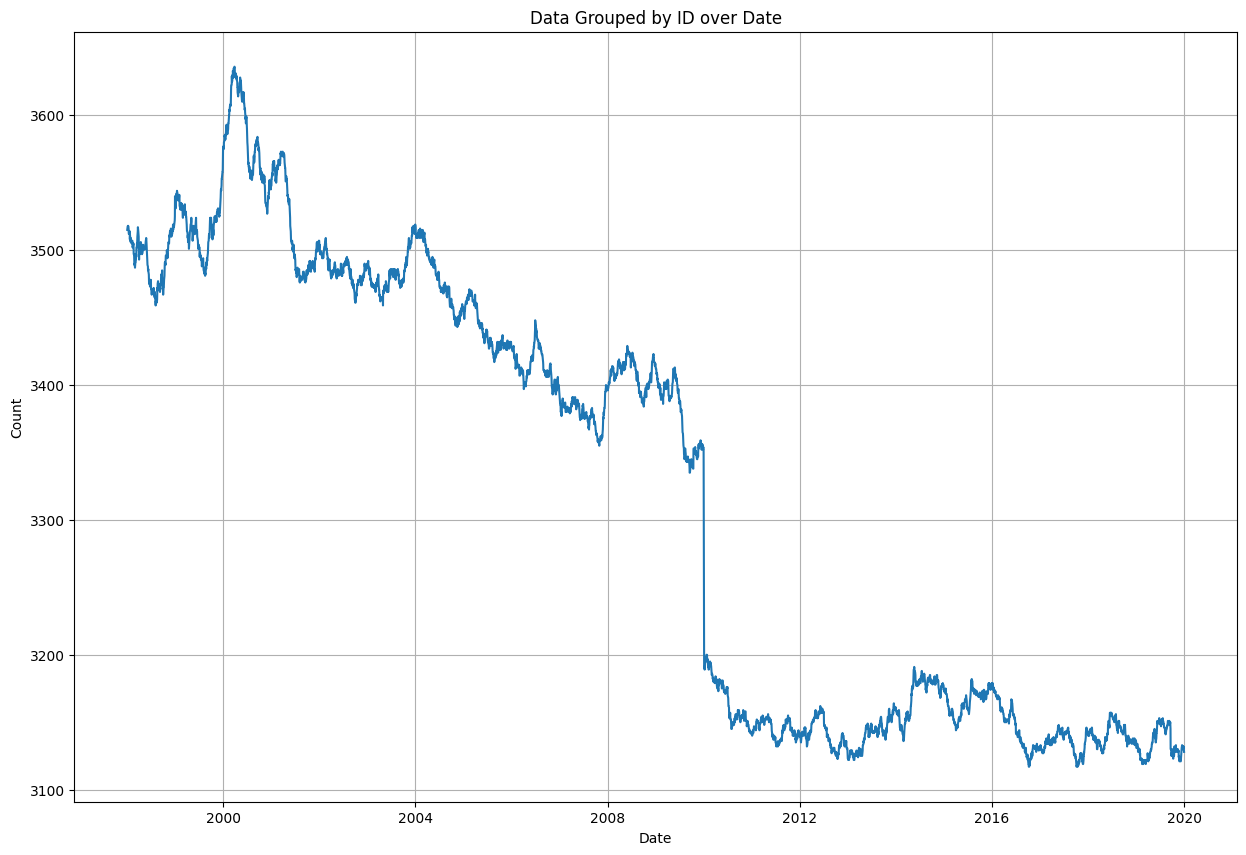

In [234]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=assets_per_date, markers=True)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Data Grouped by ID over Date')
plt.grid(True)
plt.show()

The data shows there were 3515 assets at the start of 1998. The values then climbed, reaching a peak of around 3636 assets in March 2000. After this high point, the asset values experienced a sharp downturn in January 2010. Following this decline, the number of assets has remained relatively steady, fluctuating around 3100.


## Propose a criterion to accommodate a changing estimation universe.

Volatility, Volume, and Short-term Momentum are good criteria to accommodate a changing investment universe:

1. Liquidity:
Helps identify assets with desired liquidity to trade

2. Volume:
Filters out thinly traded, illiquid assets.
Ensures sufficient liquidity for efficient execution.

3. Short-term Momentum:
Identifies assets with strong upward or downward price trends.
Useful for momentum-based strategies that ride short-term trends.
Incorporating these criteria allows for a dynamic investment universe that adapts to changing market conditions and investor preferences, while considering risk, liquidity, and potential returns.

In [235]:
# Choose relevant factors for the model 
features = ['Specific Risk', '20-Day ADV', 'Growth', 'Volatility', 'Profitability', 
           'Dividend Yield', 'Value', 'Market Sensitivity', 'Medium-Term Momentum', 
           'Short-Term Momentum', 'Liquidity']

### Rescaling the Dataset

Rescaling Volume values between 0 and 1 

In [236]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#data["20-Day ADV"] = scaler.fit_transform(data[["20-Day ADV"]])

### Windsorizing the universe

In [237]:
def winsorize_data(df, features, lower_quantile=0.05, upper_quantile=0.95):
    # Copy the DataFrame to avoid modifying the original data
    df_copy = df.copy()
    
    # Apply winsorization to each feature
    for feature in features:
        lower_bound = df_copy[feature].quantile(lower_quantile)
        upper_bound = df_copy[feature].quantile(upper_quantile)
        
        # Drop rows where the feature values are outside the quantile range
        df_copy = df_copy[(df_copy[feature] >= lower_bound) & (df_copy[feature] <= upper_bound)]
    
    return df_copy

# Example usage
date_groups = data.groupby("date").apply(lambda x: (x.index.min(), x.index.max()))
winsorized_data = {}

for date, (start, end) in enumerate(date_groups):
    w_assets = winsorize_data(data.loc[start:end], features)
    winsorized_data[date] = w_assets

In [238]:
w_data = pd.concat(winsorized_data)

In [239]:
w_data = w_data.reset_index().drop(["level_0", "level_1"], axis=1)
w_data.head(5)

,ID,date,Total Return,Specific Risk,20-Day ADV,Growth,Volatility,Profitability,Dividend Yield,Value,Market Sensitivity,Medium-Term Momentum,Short-Term Momentum,Liquidity
0,11JS8VT41,1998-01-02,0.000000,37.705799,4636298,1.044603,0.719389,0.154666,-1.044360,-0.074093,-0.014233,1.132102,-0.475880,0.305234
1,12UQZS931,1998-01-02,-0.015909,34.451697,36918387,-1.014866,0.663685,-0.243640,0.807362,-0.154430,-0.636428,-1.175372,0.759702,0.084495
2,138B8SM16,1998-01-02,-0.001030,17.930037,1663900,0.021311,-0.188549,-0.253224,0.157221,0.059088,-0.771924,0.789997,0.740704,-0.754484
3,13MXHSXY8,1998-01-02,-0.032164,46.737461,3492098,-0.042537,0.302639,-0.507391,-1.044360,0.763120,0.911950,-0.580871,-0.953378,0.943396
4,145PRNR29,1998-01-02,0.022508,27.697874,2671275,0.023719,0.075133,0.112032,0.044762,0.061219,-0.438912,-0.288248,0.782140,-0.528343


In [240]:
data = w_data

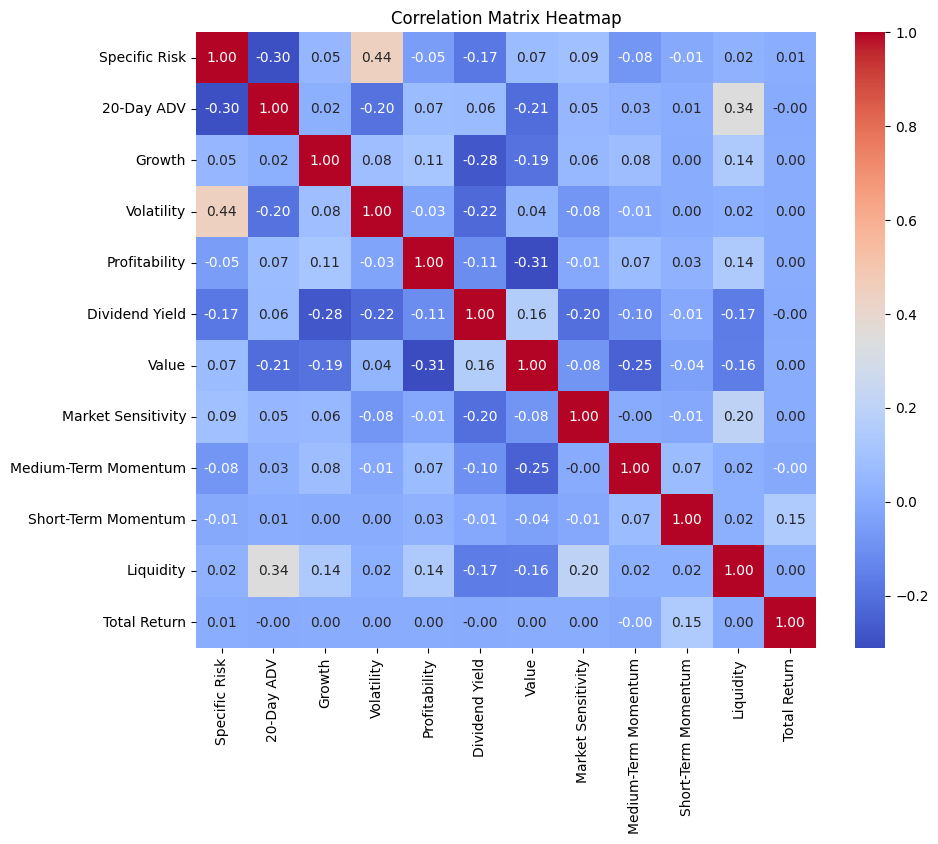

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data[features + ["Total Return"]].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [242]:
# Highly correlated features are excluded 
factors = ['20-Day ADV', 'Growth', 'Volatility', 'Profitability', 
           'Dividend Yield', 'Value', 'Market Sensitivity', 'Medium-Term Momentum', 
           'Short-Term Momentum', 'Liquidity']

Factors don't seem too correlated to the total return

In [243]:
data["date"] = pd.to_datetime(data["date"]).dt.date

# Group the DataFrame by date and find the first and last index for each date.
# This makes filtering significantly faster
date_groups = data.groupby("date").apply(lambda x: (x.index.min(), x.index.max()))

In [244]:
len(date_groups)

5535

In [245]:
import pandas as pd
from multiprocessing import Pool, cpu_count

# Function to process each date group in parallel
def process_date_group(date_group):
    date, (min_index, max_index) = date_group  # Unpack the date group tuple
    ID_count_date = {}  # Dictionary to store ID counts for the current date group
    for index in range(min_index, max_index + 1):
        ID = data.at[index, 'ID']  # Get the ID from the DataFrame
        if ID in ID_count:
            ID_count[ID] += 1  # Increment count if ID is already present
        else:
            ID_count[ID] = 1  # Set count to 1 if ID is encountered for the first time
        ID_count_date[ID] = ID_count[ID]  # Store the count for the current ID
    # Return the date, ID counts dictionary
    return {'date': [date] * len(ID_count_date), 'ID': list(ID_count_date.keys()), 'count': list(ID_count_date.values())}

# Initialize ID_count dictionary
ID_count = {}

# Group the DataFrame by date and find the first and last index for each date
date_groups = data.groupby("date").apply(lambda x: (x.index.min(), x.index.max()))

# Use multiprocessing Pool to parallelize the processing of date groups
with Pool(cpu_count()) as pool:
    # Map the process_date_group function to each date group
    results = pool.map(process_date_group, date_groups.items())

# Concatenate the individual date ID counts dictionaries into a single DataFrame
date_ID_counts = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)

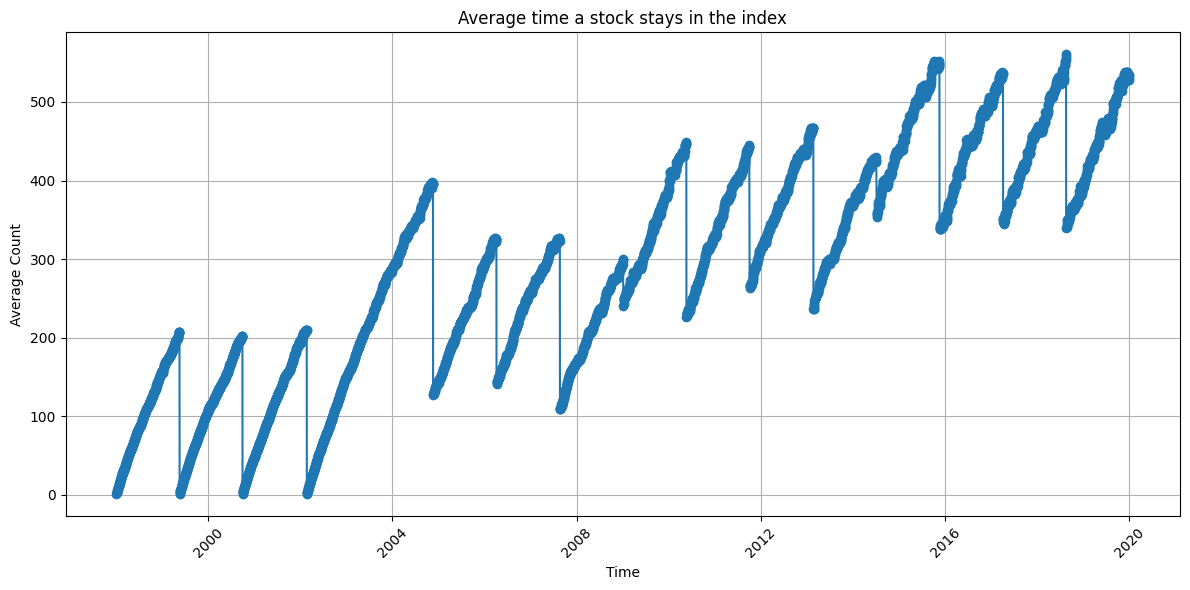

In [246]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime format
date_ID_counts['date'] = pd.to_datetime(date_ID_counts['date'])

# Group by 'ID' and calculate the mean count for each ID
average_count_per_ID = date_ID_counts.groupby('date')['count'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(average_count_per_ID.index, average_count_per_ID.values, marker='o', linestyle='-')
plt.title('Average time a stock stays in the index')
plt.xlabel('Time')
plt.ylabel('Average Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [247]:
data["Num days in Index"] = date_ID_counts["count"]

In [248]:
weights = [0.2/data["Liquidity"].max(), 0.15/data["20-Day ADV"].max(), 0.15/data["Short-Term Momentum"].max() , 0.5/data["Num days in Index"].max()]

In [249]:
total_sum = np.sum(weights)
normalized_weights = [w / total_sum for w in weights]

In [250]:
normalized_weights

[0.6265026651913045,
 2.0402192692768986e-09,
 0.37184276674812466,
 0.0016545660203515589]

In [251]:
import numpy as np

# Assume means is a list containing means of each feature
means = [data["Liquidity"].max(), data["20-Day ADV"].max(), data["Short-Term Momentum"].max(), data["Num days in Index"].max()]

# Element-wise multiplication
result = np.multiply(normalized_weights, means)

#sanity check
print(result)

[0.90405487 0.67804116 0.67804116 2.26013718]


We see that the values look reasonable, hence we can use the weights

In [252]:
weights = normalized_weights

In [253]:
import pandas as pd

criteria = ["Liquidity", "20-Day ADV", "Short-Term Momentum" , "Num days in Index"]
#weights = [0, 0.0, 0.0, 0.0]

def FilterAssetDate(df, n, criteria, weights):
    # Calculate weighted score
    df['weighted_score'] = 0
    for i, criterion in enumerate(criteria):
        df['weighted_score'] += df[criterion] * weights[i]
    
    # Sort assets based on weighted score
    sorted_assets = df.sort_values(by='weighted_score', ascending=False)
    
    # Remove the weighted score column
    sorted_assets = sorted_assets.drop('weighted_score', axis=1)
    
    # Take the top n assets after sorting
    # Check if there are at least n factors available
    if len(sorted_assets) >= n:
        top_n_assets = sorted_assets.head(n)
    else:
        top_n_assets = sorted_assets
    
    return top_n_assets

def AssetFilter(data, n):
    filtered_data = {}

    for date, (start, end) in enumerate(date_groups):
        top_n_assets = FilterAssetDate(data.loc[start:end], n, criteria, weights)
        filtered_data[date] = top_n_assets
    return filtered_data

# Filter top N stocks per day
filtered_data = AssetFilter(data, 1000)

In [254]:
df = pd.concat(filtered_data)
df = df.reset_index().drop(["level_0","level_1"], axis=1)

In [255]:
#recalculate indexes for date
df["date"] = pd.to_datetime(df["date"]).dt.date
date_groups = df.groupby("date").apply(lambda x: (x.index.min(), x.index.max()))

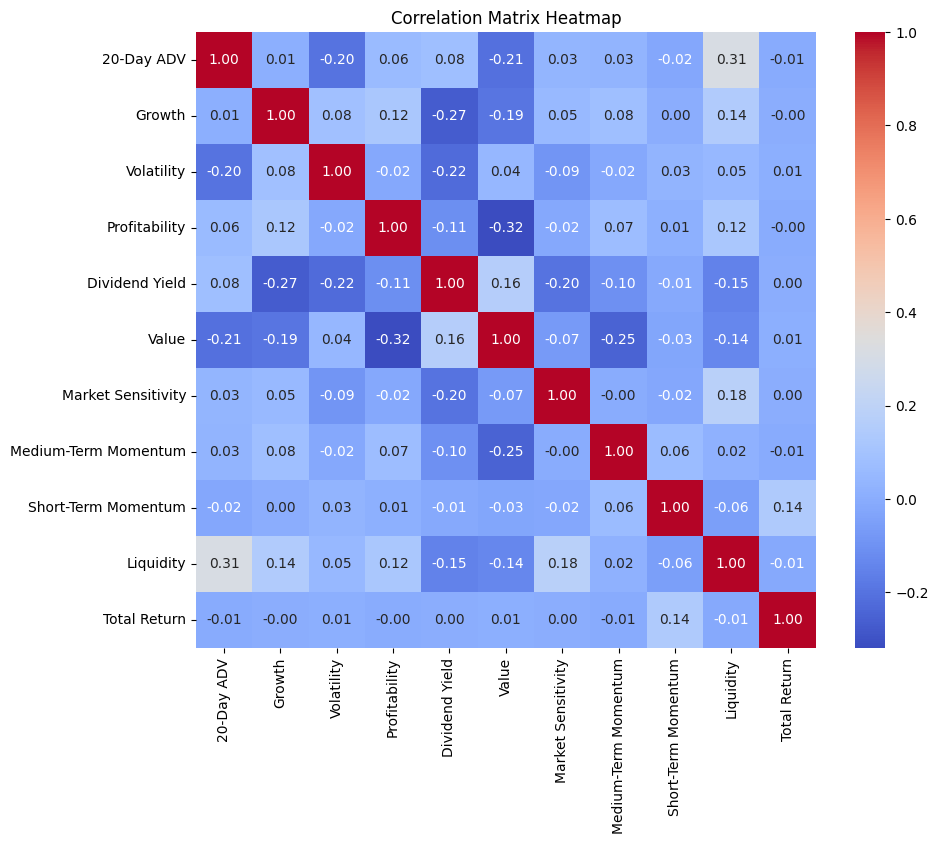

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df[factors + ["Total Return"]].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Features are showing high correlation but returns don't seem to be correlated to features, this is weird behavior.

## Selecting our stock universe

In [257]:
# To use 1000 stocks as data 
data = df

In [258]:
len(df)//1000

5535

## Factor model
Perform a fundamental factor model using the available factors.

In [259]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

train = data[factors]  # Contains factor data
target = data["Total Return"]  # Contains target data

# Create a list to store regression results
regression_results = []
errors = []

# Loop through each group of data based on dates
for date, (start, end) in date_groups.items():
    # Select data for the current date group
    X = train.iloc[start: end]
    y = target.iloc[start : end]
    
    # Fit OLS model
    X = sm.add_constant(X)  # Add constant term
    model = sm.OLS(y, X).fit()
    
    # Extract regression coefficients and errors
    coefficients = model.params
    error = model.resid
    
    # Append regression results to the list
    regression_results.append(coefficients.tolist())
    errors.append(error)

In [260]:
# Convert the list to a DataFrame and add column names
factor_loadings = pd.DataFrame(regression_results, columns= ["Intercept"] + factors) #indicative of B_t

# add an array of 1s to the factor loadings
#factor_loadings['ones'] = np.ones(factor_loadings.shape[0])

In [261]:
factor_loadings.head(5) # shape is m*T

,Intercept,20-Day ADV,Growth,Volatility,Profitability,Dividend Yield,Value,Market Sensitivity,Medium-Term Momentum,Short-Term Momentum,Liquidity
0,-0.000687,-1.721257e-10,-0.000254,0.001030,-0.002093,0.000786,0.001438,0.001798,-0.010155,0.000339,-0.000246
1,0.003367,-9.506954e-11,-0.000918,0.000933,-0.003333,-0.000611,-0.000892,0.006529,-0.002842,0.008157,0.001240
2,-0.009743,-3.282398e-11,-0.000370,-0.001042,-0.000479,-0.003165,0.001113,-0.001586,0.000521,0.006771,0.000108
3,-0.007508,8.121285e-11,-0.002140,0.002512,0.001923,-0.001339,-0.000913,-0.001829,-0.003261,0.004998,0.001132
4,-0.008949,-3.428601e-11,0.001397,0.001634,0.001244,-0.001949,0.001354,0.000443,-0.001696,0.010193,0.002133


In [262]:
errors = np.array(errors) #shape is n*T

## Factor Turnovers

Plot the daily turnover of each factor over time. Sort factors from lowest turnover to higher turnover and determine a cluster of lower-turnover and high-turnover factors.

### Individual plot of factor turnovers over time

In [263]:
intercepts = factor_loadings["Intercept"]
factor_loadings = factor_loadings.drop("Intercept", axis = 1)

In [264]:
def turnover(factor_loadings):
    factor_turnovers = ((factor_loadings.diff()).fillna(0))**2 / ((factor_loadings.shift(1)) ** 2).sum()
    return factor_turnovers

factor_turnovers = turnover(factor_loadings)

In [265]:
factor_turnovers

,20-Day ADV,Growth,Volatility,Profitability,Dividend Yield,Value,Market Sensitivity,Medium-Term Momentum,Short-Term Momentum,Liquidity
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
1,0.000196,0.000024,7.516767e-08,0.000032,0.000078,1.378229e-04,1.129706e-04,0.000912,0.000177,0.000042
2,0.000128,0.000016,3.096041e-05,0.000167,0.000260,1.019826e-04,3.323688e-04,0.000193,0.000006,0.000024
3,0.000430,0.000171,1.002917e-04,0.000118,0.000133,1.041399e-04,2.981938e-07,0.000244,0.000009,0.000020
4,0.000441,0.000681,6.112916e-06,0.000009,0.000015,1.304109e-04,2.605452e-05,0.000042,0.000078,0.000019
...,...,...,...,...,...,...,...,...,...,...
5530,0.000028,0.000002,2.220353e-04,0.000247,0.000005,1.367756e-03,1.596690e-04,0.000054,0.000060,0.000045
5531,0.000024,0.000009,2.768544e-05,0.000052,0.000024,4.226456e-04,2.480649e-05,0.000002,0.000028,0.000129
5532,0.000001,0.000002,8.985289e-05,0.000001,0.000001,1.276105e-07,1.222962e-04,0.000001,0.000011,0.000028
5533,0.000045,0.000002,8.242624e-05,0.000205,0.000022,4.651906e-04,3.109854e-05,0.000002,0.000004,0.000020


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

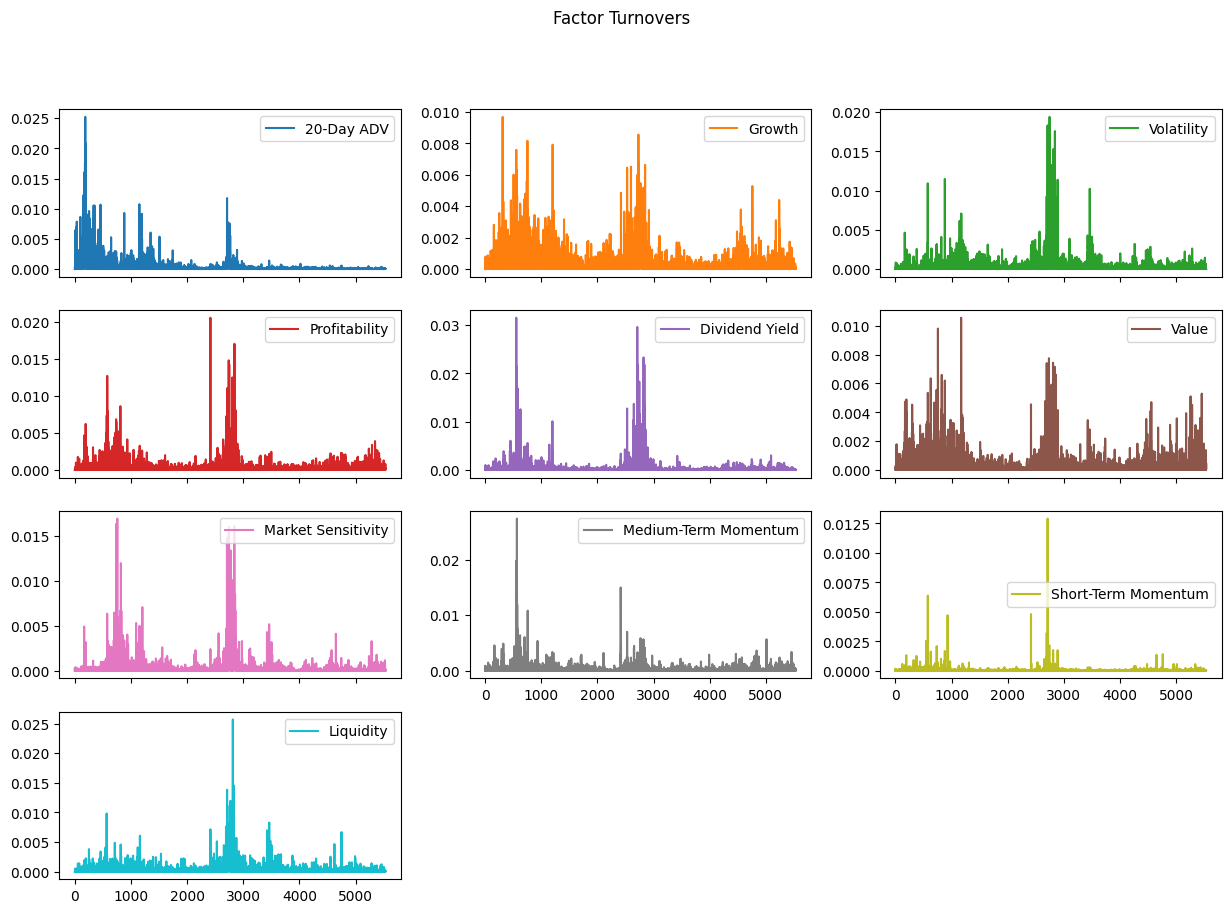

In [266]:
# Plot the factor turnover over time
factor_turnovers.plot(subplots=True, figsize=(15, 10), layout=(-1, 3), title="Factor Turnovers")

### Overlapping plot of factor turnovers over time

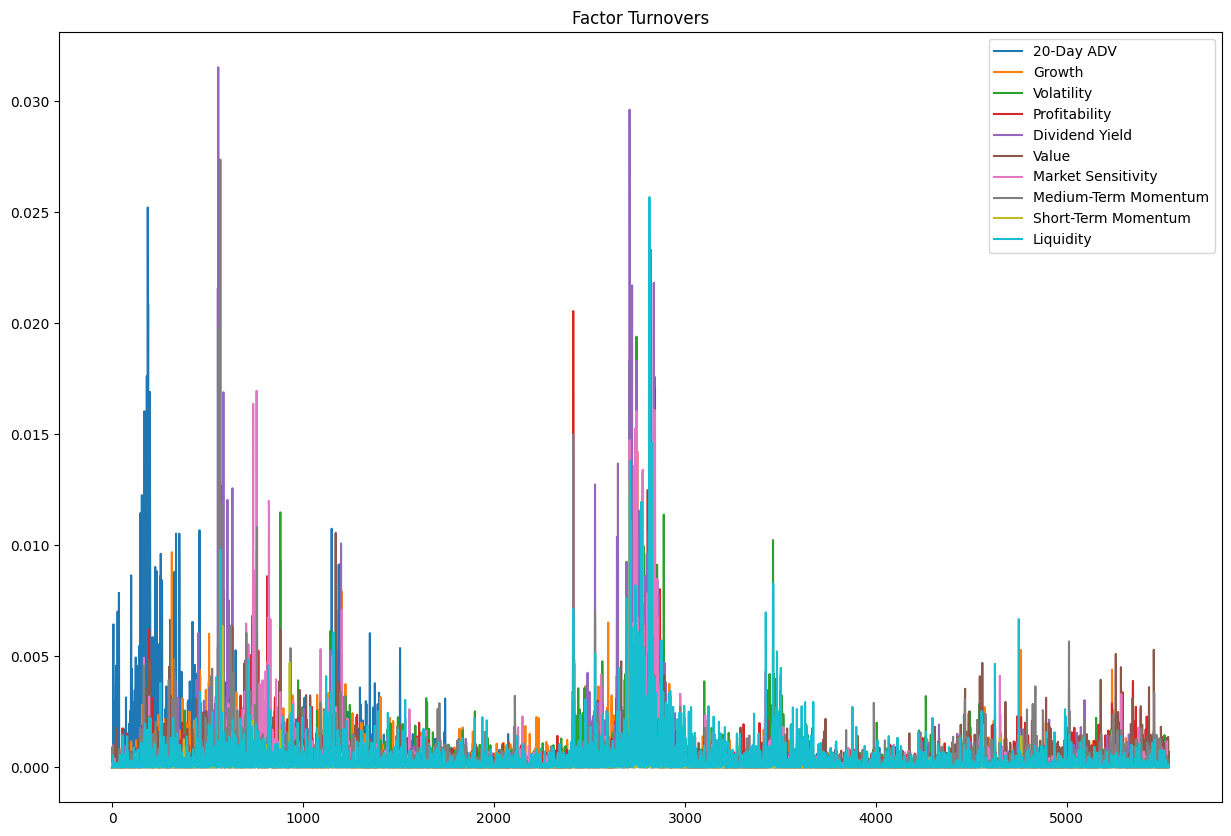

In [267]:
factor_turnovers.plot(figsize=(15, 10), title="Factor Turnovers")
plt.show()

### Average, low and high turnovers

In [268]:
# Calculate average turnover for each factor
avg_factor_turnover = factor_turnovers.mean()

# Sort factors from lowest to highest average turnover
sorted_turnover = avg_factor_turnover.sort_values()

In [269]:
sorted_turnover

Short-Term Momentum     0.000052
Medium-Term Momentum    0.000301
Market Sensitivity      0.000324
Value                   0.000333
Profitability           0.000348
Growth                  0.000361
Liquidity               0.000361
20-Day ADV              0.000363
Dividend Yield          0.000385
Volatility              0.000403
dtype: float64

In [270]:
# Determine lower and higher turnover clusters
num_lower = int(len(sorted_turnover) * 0.5) #bottom 50% 
num_higher = int(len(sorted_turnover) * 0.5) #top 50%
lower_turnover_factors = sorted_turnover.index[:num_lower]
higher_turnover_factors = sorted_turnover.index[-num_lower:]

print(f"Lower Turnover Factors: {list(lower_turnover_factors)}")
print(f"Higher Turnover Factors: {list(higher_turnover_factors)}")

Lower Turnover Factors: ['Short-Term Momentum', 'Medium-Term Momentum', 'Market Sensitivity', 'Value', 'Profitability']
Higher Turnover Factors: ['Growth', 'Liquidity', '20-Day ADV', 'Dividend Yield', 'Volatility']


In [271]:
higher_turnover_data = data[higher_turnover_factors]
lower_turnover_data = data[lower_turnover_factors]

In [272]:
#backup = data
#data = backup

## Factor Orthogonalization
Orthogonalize high-turnover factors to lower-turnover ones

### Gram-Schmidt Orthogonalization

Instead of regressing higher turnover factors over lower, we are using Gram-Schmidt Orthogonalization 

$$
\begin{aligned}
X_Y &= [X, Y] \\
Q, R &= \text{gram_schmidt}(X_Y) \\
Q_X, Q_Y &= Q[:, :X.shape[1]], Q[:, X.shape[1]:] \\
Y_\text{orth} &= Q_Y
\end{aligned}
$$

### Matrix Multiplication

$$
\begin{aligned}
A_{m x n} \times B_{n x p} = C_{m x p}
\end{aligned}
$$

### Vector Norm

$$
\begin{aligned}
||x|| = \sqrt{\sum_{i=1}^{n} x_i^2}
\end{aligned}
$$

### Gram-Schmidt Formula

$$
\begin{aligned}
q_i = \frac{v_i - \sum_{j=1}^{i-1} (q_j^T v_i) q_j}{||v_i - \sum_{j=1}^{i-1} (q_j^T v_i) q_j||}
\end{aligned}
$$

Where:

* $q_i$ is the $i^{th}$ orthogonal vector
* $v_i$ is the $i^{th}$ column of the input matrix
* $q_j$ is the $j^{th}$ orthogonal vector

In [273]:
import numpy as np

def gram_schmidt(X):
    """
    Performs Gram-Schmidt orthogonalization on the columns of X.
    Returns the orthogonal matrix Q and the upper triangular matrix R.
    """
    Q, R = np.zeros_like(X), np.zeros_like(X.T @ X)
    m, n = X.shape

    for i in range(n):
        u = X[:, i]
        for j in range(i):
            R[j, i] = Q[:, j] @ u
            u -= R[j, i] * Q[:, j]
        R[i, i] = np.linalg.norm(u)
        Q[:, i] = u / R[i, i]

    return Q, R

# Assuming you have the higher_turnover_data and lower_turnover_data DataFrames
X = lower_turnover_data.values
Y = higher_turnover_data.values

# Concatenate X and Y horizontally
X_Y = np.hstack((X, Y))

# Perform Gram-Schmidt orthogonalization
Q, _ = gram_schmidt(X_Y)

# Split Q into Q_X and Q_Y
Q_X, Q_Y = Q[:, :X.shape[1]], Q[:, X.shape[1]:]

# Q_Y now contains the orthogonalized high-turnover factors
Y_orth = Q_Y

In [274]:
data[higher_turnover_factors] = Y_orth
data.head(5)

,ID,date,Total Return,Specific Risk,20-Day ADV,Growth,Volatility,Profitability,Dividend Yield,Value,Market Sensitivity,Medium-Term Momentum,Short-Term Momentum,Liquidity,Num days in Index
0,SVJCWHHN6,1998-01-02,0.000000,43.143242,0.000199,0.000593,-0.000081,0.062910,-0.000267,-0.410707,0.396167,-0.682149,1.225699,0.000814,1
1,B6F8PPS91,1998-01-02,0.000000,41.574136,-0.000333,0.000248,0.000292,-0.288302,-0.000381,0.413622,0.143573,-0.350923,1.102358,0.001038,1
2,GR9PFYR92,1998-01-02,-0.010526,49.780556,-0.000257,0.000539,0.000317,-0.901912,-0.000205,0.034416,0.937073,0.060669,1.182145,0.000850,1
3,4MKSTNR62,1998-01-02,0.032258,39.447043,-0.000350,0.000288,0.000229,-0.300623,0.000787,1.488965,-0.593355,-0.508651,1.104560,0.001118,1
4,CJL74HTH9,1998-01-02,0.009677,43.921026,-0.000348,0.000667,0.000265,-0.226079,-0.000296,1.074136,-0.264665,-1.000238,0.914555,0.001064,1


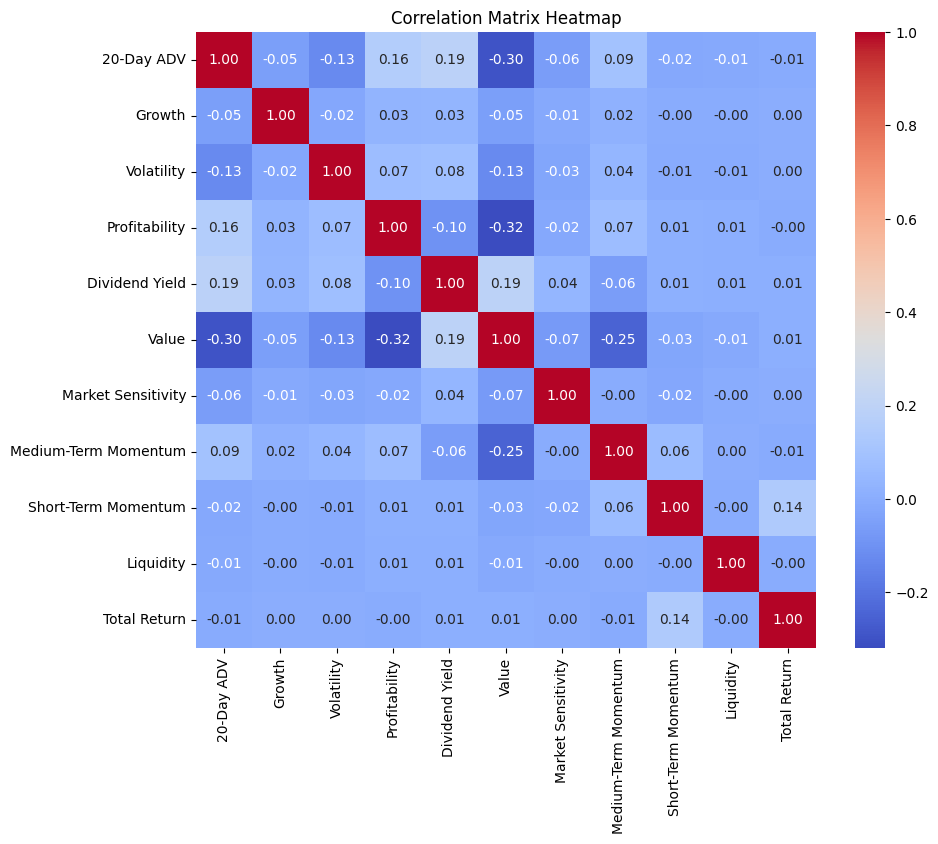

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data[factors + ["Total Return"]].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Cross-Sectional Regression
Perform Cross-Sectional regression for the combined factor universe 
Use the specific risk in the dataset for the weights.

### Regression Equation

The cross sectional regression equation can be given by:
$$
\begin{aligned}
y &= \beta_0 + \beta_1 X + \epsilon \\
\text{where:} \\
y &= \text{dependent variable} \\
X &= \text{independent variable} \\
\beta_0 &= \text{intercept} \\
\beta_1 &= \text{slope} \\
\epsilon &= \text{error term}
\end{aligned}
$$


In [276]:
#recalculate indexes for date
data["date"] = pd.to_datetime(data["date"]).dt.date
date_groups = df.groupby("date").apply(lambda x: (x.index.min(), x.index.max()))

In [277]:
X = data[factors]
y = data['Total Return']
X["ones"] = 1

In [278]:
weights = 1/data["Specific Risk"]

In [279]:
import numpy as np
from sklearn.linear_model import LinearRegression
from joblib import Parallel, delayed
from tqdm import tqdm
import statsmodels.api as sm
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Perform regression for each row in parallel for significantly faster calculation
def regression(X, y, w):
    # Fit WLS regression model
    X_with_intercept = sm.add_constant(X)
    model = sm.WLS(y, X_with_intercept, weights=w)
    results = model.fit()
    return results.params, results.rsquared

# Parallelize regression using joblib
results = Parallel(n_jobs=-1)(
    delayed(regression)(
        X.loc[date_group[0]:date_group[1]], 
        y.loc[date_group[0]:date_group[1]], 
        weights.loc[date_group[0]:date_group[1]]
    ) 
    for date_group in tqdm(date_groups, desc="Processing rows")
)

Processing rows: 100%|██████████| 5535/5535 [00:23<00:00, 233.40it/s]


### Plot their returns, and compute Annual Returns and Sharpe Ratios. 

### Annual Returns
The annual returns are calculated as the median of the factor coefficients multiplied by 252, assuming daily returns. The median is used instead of the mean to account for any long-tail skews in the data.

$$\text{Annual Returns} = \text{median}(\text{factor coefficients}) \times 252$$

### Annual Return Variability
The annual return variability is computed as the interquartile range (IQR) of the factor coefficients multiplied by 252. This metric provides insight into the variability or dispersion of annual returns across different factors.

$$\text{Annual Return Variability} = \text{IQR}(\text{factor coefficients}) \times 252$$

### Sharpe Ratios
The Sharpe ratios represent the risk-adjusted return and are calculated by dividing the annual returns by the standard deviation of the factor coefficients, multiplied by the square root of 252 (the number of trading days in a year).

$$\text{Sharpe Ratios} = \frac{\text{Annual Returns}}{\text{Standard Deviation}(\text{factor coefficients}) \times \sqrt{252}}$$

### Mean R-squared
The mean R-squared is the average value of the coefficient of determination (R-squared) across all factors. It measures the proportion of the variance in the dependent variable (returns) that is predictable from the independent variables (factors).

$$\text{Mean R}^2 = \frac{1}{N} \sum_{i=1}^{N} \text{R}^2_i$$

where $N$ is the number of factors.

In [280]:
dates = df.groupby("date").apply(lambda x: x.index.min())
# Extract and process the results
factor_coefs = np.array([result[0] for result in results])
r_squared = np.array([result[1] for result in results])

In [281]:
factor_coefs = np.nan_to_num(factor_coefs, copy=False, nan=0, posinf=0, neginf=0)
r_squared = np.nan_to_num(r_squared, copy=False, nan=0, posinf=0, neginf=0)

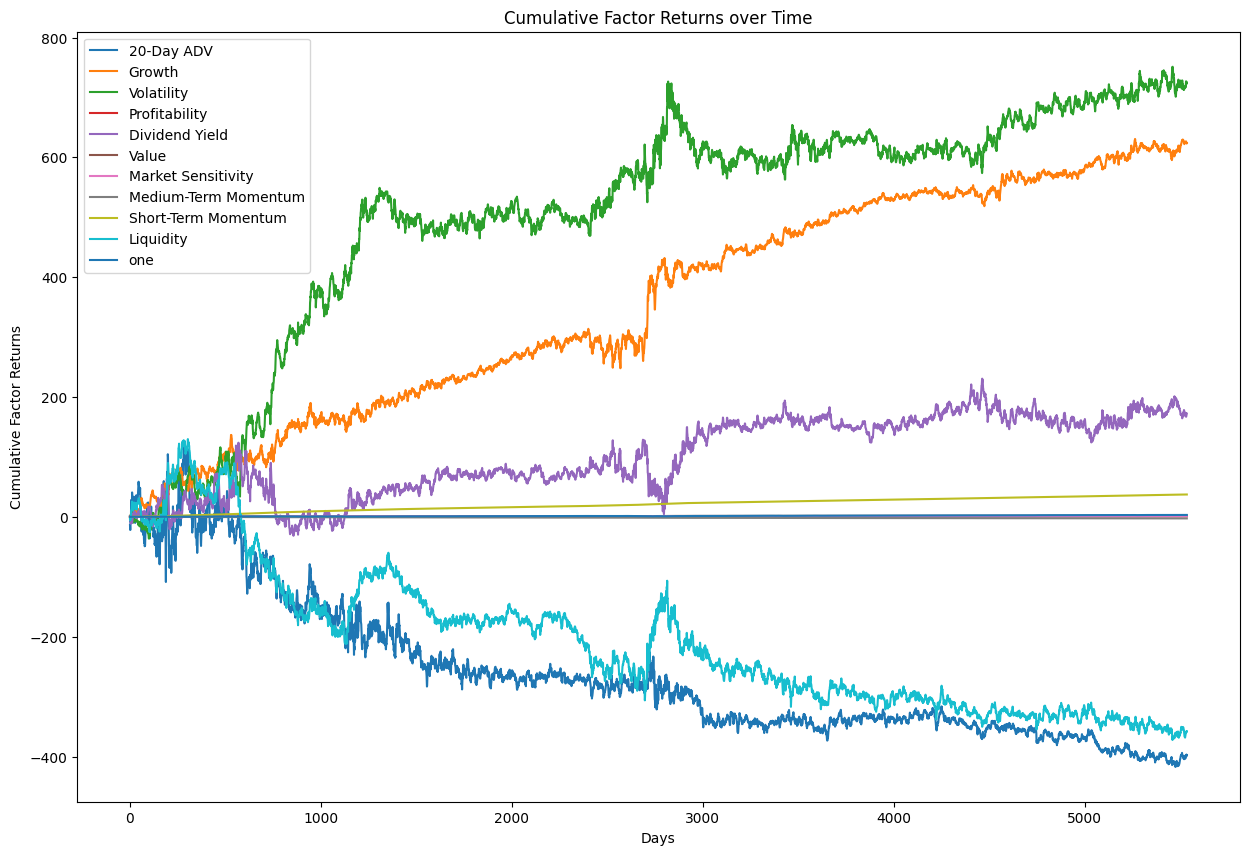

In [282]:
plt.figure(figsize=(15,10))
# Plot cumulative sum of each factor over time
for i, factor in enumerate(factors+["one"]):
    plt.plot(np.cumsum(factor_coefs[:, i]), label=factor)
plt.xlabel('Days')
plt.ylabel('Cumulative Factor Returns')
plt.title('Cumulative Factor Returns over Time')
plt.legend()
plt.show()

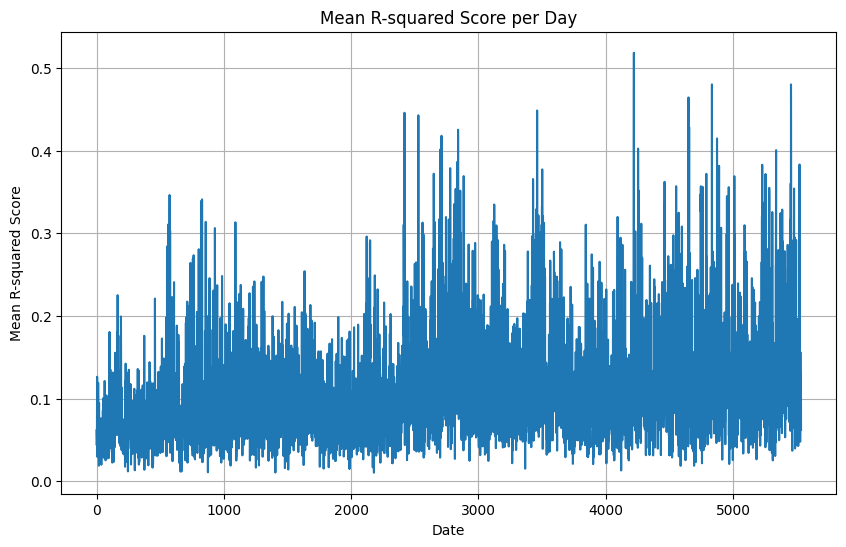

In [283]:
# Plot the mean R-squared scores per day
plt.figure(figsize=(10, 6))
plt.plot(r_squared, linestyle='-')
plt.title('Mean R-squared Score per Day')
plt.xlabel('Date')
plt.ylabel('Mean R-squared Score')
plt.grid(True)
plt.show()

In [284]:
from scipy.stats import iqr
# Calculate annual returns
annual_returns = np.median(factor_coefs) * 252  #daily returns, multiply by 252 for annualization, median is used for median value instead of mean because of long tail skews
annual_return_variability = iqr(factor_coefs) * 252

# Calculate Sharpe Ratios
sharpe_ratios = (annual_returns) / factor_coefs.std() * np.sqrt(252)  

print('Annual Returns:', annual_returns)
print('Annual Return variability:',annual_return_variability)
print('Sharpe Ratios:', sharpe_ratios)
print('Mean R2:', r_squared.mean())

Annual Returns: 0.21880283745644502
Annual Return variability: 5.033980161652085
Sharpe Ratios: 1.1091026156552732
Mean R2: 0.11096133537638053


### QLIKE Test Statistic
The QLIKE (Quasi-Likelihood-based Investment Strategy Evaluation) test statistic is a measure of the performance of a portfolio. It evaluates how well a portfolio's factor coefficients align with the average factor coefficients.

In [285]:
y = data[["Total Return","date"]].groupby("date").sum()

In [286]:
factor_loadings = factor_coefs
factor_loadings = np.nan_to_num(factor_loadings, nan=0)
factor_covariance = np.cov(factor_loadings.T)
factor_loadings_T = factor_loadings.T
residual_covariance = np.cov(factor_loadings)
y = np.array(y)
returns = y*y.T

print("factor_loadings shape:", factor_loadings.shape)
print("factor_covariance shape:", factor_covariance.shape)
print("factor_loadings transpose shape:", factor_loadings_T.shape)
print("residual_covariance shape:", residual_covariance.shape)
print("returns shape:", returns.shape)

factor_loadings shape: (5535, 11)
factor_covariance shape: (11, 11)
factor_loadings transpose shape: (11, 5535)
residual_covariance shape: (5535, 5535)
returns shape: (5535, 5535)


In [287]:
import numpy as np
from joblib import Parallel, delayed

# Define QLIKE statistic calculation function
def calculate_QLIKE(factor_loadings, factor_covariance, returns):
    # Compute predicted returns for all portfolios based on factor model
    predicted_returns = np.dot(factor_loadings, np.dot(factor_covariance, factor_loadings.T)) + residual_covariance
    
    # Compute realized volatilities for all portfolios
    realized_volatilities = np.var(returns, axis=1)

    # Compute predicted volatility (factor model volatility)
    predicted_volatility = np.var(predicted_returns)

    # Calculate QLIKE for each portfolio
    def calculate_single_QLIKE(portfolio_returns, realized_volatility):
        return (realized_volatility / predicted_volatility) - np.log(realized_volatility / predicted_volatility) - 1

    QLIKE_values = Parallel(n_jobs=-1)(
        delayed(calculate_single_QLIKE)(portfolio_returns, realized_volatility)
        for portfolio_returns, realized_volatility in zip(returns, realized_volatilities)
    )

    return np.array(QLIKE_values)

# Generate random portfolios
num_portfolios = 100  # Number of random portfolios
portfolio_returns = []

for _ in range(num_portfolios):
    # Generate random weights
    weights = np.random.rand(factor_loadings.shape[0])
    weights /= np.sum(weights)  # Normalize weights to sum up to 1
    
    # Calculate portfolio returns
    portfolio_return = np.dot(weights, returns)
    portfolio_returns.append(portfolio_return)

# Convert list of portfolio returns to numpy array
portfolio_returns = np.array(portfolio_returns)

# Calculate QLIKE statistic for random portfolios
QLIKE_random_portfolios = calculate_QLIKE(factor_loadings, factor_covariance, portfolio_returns)

print('QLIKE for random portfolios:', QLIKE_random_portfolios.mean())

QLIKE for random portfolios: 9.777798973338404


A QLIKE statistic of approximately 9.79 suggests that the realized volatility (variance of returns) is substantially higher than the predicted volatility from the factor model. This indicates a potential lack of fit of the factor model to the actual returns data, as the model's predicted volatility underestimates the actual volatility observed in the returns.

In practical terms, this could imply that the factor model is not capturing all the relevant factors or is not adequately accounting for the variability in the returns. Further investigation into the model's specification or additional factors may be necessary to improve its predictive power. Additionally, alternative models or risk management strategies may need to be considered to better address the observed volatility in the returns data.

## Implement Minimum Variance Portfolios tests.

We aim to construct the minimum variance portfolio, which seeks to minimize portfolio variance subject to certain constraints. Traditionally, mean-variance optimization is employed for this purpose. However, in our scenario where we assume a zero mean return distribution, conventional mean-variance optimization becomes inappropriate. Instead, we redefine our objective function to focus solely on minimizing portfolio variance:

### Objective Function

$$\min_{\boldsymbol{\theta}_t} \frac{1}{2} \boldsymbol{\theta}_t^T \boldsymbol{\Omega}_{r_t} \boldsymbol{\theta}_t$$

Here, $\boldsymbol{\theta}_t$ represents the portfolio weights, and $\boldsymbol{\Omega}_{r_t}$ is the covariance matrix of returns at time $t$.

### Constraints

We maintain the constraint that the sum of portfolio weights equals one:

$$\sum_{i=1}^{N} \theta_{t,i} = 1$$

where $N$ is the number of assets in the portfolio.

### Analytical Solution

The solution to this optimization problem involves the Sherman-Morrison-Woodbury Formula to handle the inversion of the covariance matrix $\boldsymbol{\Omega}_{r_t}$, which is typically a large matrix. Instead of directly inverting $\boldsymbol{\Omega}_{r_t}$, we decompose it into smaller, more manageable matrices.

#### Sherman-Morrison-Woodbury Formula

The formula allows us to express the inverse of $\boldsymbol{\Omega}_{r_t}$ as a combination of the inverses of smaller matrices:

$$\boldsymbol{\Omega}_{r_t}^{-1} = \left(\boldsymbol{\Omega}_\epsilon + \boldsymbol{B} \boldsymbol{\Omega}_f \boldsymbol{B}^T \right)^{-1} = \boldsymbol{\Omega}_\epsilon^{-1} - \boldsymbol{\Omega}_\epsilon^{-1} \boldsymbol{B} \left(\boldsymbol{\Omega}_f^{-1} + \boldsymbol{B}^T \boldsymbol{\Omega}_\epsilon^{-1} \boldsymbol{B}\right)^{-1} \boldsymbol{B}^T \boldsymbol{\Omega}_\epsilon^{-1}$$

Here, $\boldsymbol{\Omega}_f$ is a smaller matrix, $\boldsymbol{\Omega}_\epsilon$ is a diagonal matrix, and $\boldsymbol{B}$ is a matrix representing the factor loadings.

This formula enables us to efficiently compute the inverse of $\boldsymbol{\Omega}_{r_t}$ without directly inverting the large covariance matrix. By leveraging this approach, we can derive the optimal portfolio weights $\boldsymbol{\theta}_t$ while efficiently managing the computational complexity associated with large covariance matrices.

In [288]:
import numpy as np
from scipy.optimize import minimize

# Define the covariance matrix Omega_r_t
Omega_r_t = factor_covariance + np.dot(factor_loadings_T, np.dot(residual_covariance, factor_loadings))

# Define the number of assets (N)
N = factor_loadings.shape[1]

# Define the initial guess for the portfolio weights (theta_t)
theta_t_init = np.array([1.0 / N] * N)

# Define the bounds for the portfolio weights (between 0 and 1)
bounds = [(0, 1) for _ in range(N)]

# Define the constraint that the sum of the weights equals 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Define the objective function to minimize (portfolio variance)
def portfolio_variance(theta_t):
	Omega_r_t_inv = np.linalg.inv(Omega_r_t)
	return 0.5 * np.dot(theta_t.T, np.dot(Omega_r_t_inv, theta_t))

# Solve the optimization problem
res = minimize(portfolio_variance, theta_t_init, method='SLSQP', bounds=bounds, constraints=constraints)

# Print the optimal portfolio weights
print(res.x)

[1.66000949e-01 1.27540376e-01 6.38570992e-01 2.44781246e-16
 5.05369930e-03 1.28151195e-04 2.62794094e-04 0.00000000e+00
 0.00000000e+00 6.18566232e-02 5.86414113e-04]


### Estimate factor covariance matrix and idio vols. Try different half-lives.

If the factor returns and residual returns have a mean of 0, we estimate both as follows:

$$ \hat{\Omega}_{f_t} = \frac{1}{T} \sum^T_{t = 1} \hat{f}_t \hat{f}^T_t$$

$$ \hat{\Omega}_{\epsilon_t} = \frac{1}{T} \sum^T_{t = 1}  \hat{\epsilon}_t \hat{\epsilon}^T_t $$

We implement halflife periods of 30 days, 60 days, 90 days, and 120 days to calculate the estimation. However, to account for the increased relevance of more recent information, we introduce a time decay factor into the formula:

$$ \hat{\Omega}_{f_t} =  \sum^T_{t = 1} w_t \hat{f}_t \hat{f}^T_t$$

$$ \hat{\Omega}_{\epsilon_t} = \sum^T_{t = 1}  w_t  \hat{\epsilon}_t \hat{\epsilon}^T_t $$

In [289]:
residual_returns_list = []
factor_values = []
i = 0
for date, (start, end) in date_groups.items():
    # Select data for the current date group
    x_train = X.iloc[start: end]
    y = target.iloc[start : end]
    
    # Calculate residual returns for each day
    residual_returns = y - np.dot(x_train, factor_coefs[i])
    #factor_values.append(x_train.mean(axis = 0))
    # Do something with residual_returns (e.g., store them in a list)
    residual_returns_list.append(residual_returns)
    
    # Increment i for the next iteration
    i += 1

In [290]:
residual_returns = np.array(residual_returns_list)

In [291]:
import numpy as np

def estimate_factor_covariance(factor_loadings, half_life):
	factor_loadings = np.nan_to_num(factor_loadings, nan=0)
	factor_covariance = np.cov(factor_loadings.T, ddof=0, aweights=np.power(0.5, np.arange(factor_loadings.shape[0])/half_life))
	return factor_covariance

def estimate_idio_volatilities(residual_returns, half_life):
    residual_returns = np.nan_to_num(residual_returns, nan=0)
    idio_volatilities = []
    for i in range(residual_returns.shape[1]):
        weights = np.power(0.5, np.arange(residual_returns.shape[0])/half_life)
        cov = np.cov(residual_returns[:, i], ddof=0, aweights=weights)
        idio_volatilities.append(np.sqrt(cov))
    return idio_volatilities

In [292]:
factor_covariances = []
idio_vols = []

half_lives = [30, 60, 90, 120, 150, 200, 252]
for half_life in half_lives:
	factor_covariance = estimate_factor_covariance(factor_loadings, half_life)
	idio_volatilities = estimate_idio_volatilities(residual_returns, half_life)
	
	factor_covariances.append(factor_covariance)
	idio_vols.append(idio_volatilities)

In [293]:
print("Mean Factor Covariances:")
for i, cov in enumerate(factor_covariances):
	print(f"Half-life: {half_lives[i]} - Mean: {np.mean(cov)}")

print("\nMean Idiosyncratic Volatilities:")
for i, vol in enumerate(idio_vols):
	print(f"Half-life: {half_lives[i]} - Mean: {np.mean(vol)}")

Mean Factor Covariances:
Half-life: 30 - Mean: 2.2936511039423126
Half-life: 60 - Mean: 2.7323105271529373
Half-life: 90 - Mean: 3.013574862362994
Half-life: 120 - Mean: 3.093425687366513
Half-life: 150 - Mean: 3.073570501843461
Half-life: 200 - Mean: 2.956555221301138
Half-life: 252 - Mean: 2.806883231068634

Mean Idiosyncratic Volatilities:
Half-life: 30 - Mean: 0.021255626409853796
Half-life: 60 - Mean: 0.022789864090927075
Half-life: 90 - Mean: 0.024115111181516248
Half-life: 120 - Mean: 0.025098127214815302
Half-life: 150 - Mean: 0.025818141189003066
Half-life: 200 - Mean: 0.026575111952721605
Half-life: 252 - Mean: 0.026953481912861496


### Factor Covariances
* The mean factor covariance increases with increasing half-life, indicating that the factor covariance matrix becomes more dispersed as the half-life increases.
* The rate of increase in mean factor covariance slows down as half-life increases, suggesting a plateau effect.
* The highest mean factor covariance is observed at a half-life of 120, indicating that this half-life captures the most significant factor covariance.

### Idiosyncratic Volatilities
* The mean idiosyncratic volatility increases with increasing half-life, indicating that the idiosyncratic volatility of assets increases as the half-life increases.
* The rate of increase in mean idiosyncratic volatility is relatively consistent across half-lives, suggesting a steady increase in idiosyncratic volatility as half-life increases.
* The highest mean idiosyncratic volatility is observed at a half-life of 252, indicating that this half-life captures the most significant idiosyncratic volatility.

### Overall
* The results suggest that increasing the half-life leads to a more dispersed factor covariance matrix and higher idiosyncratic volatility.
* The optimal half-life for capturing factor covariance and idiosyncratic volatility appears to be around 120-150, as this range shows the highest mean factor covariance and a relatively high mean idiosyncratic volatility.
* Further analysis is needed to determine the specific half-life that best captures the underlying dynamics of the data.

### Test the performance of the model under the QLIKE, MSE and Min Variance Portfolios for the first cluster, and then the second cluster.  

In [294]:
factor_loadings = factor_coefs
factor_loadings = np.nan_to_num(factor_loadings, nan=0)
factor_covariance = np.cov(factor_loadings.T)
factor_loadings_T = factor_loadings.T
residual_covariance = np.cov(factor_loadings)
y = data[["Total Return","date"]].groupby("date").sum()
y = np.array(y)
returns = y*y.T
lower_turnover_factors = sorted_turnover.index[:num_lower]
higher_turnover_factors = sorted_turnover.index[-num_lower:]

factor_loadings = pd.DataFrame(factor_coefs, columns = factors + ["ones"]).drop("ones",axis=1)
factor_covariance_matrix = pd.DataFrame(factor_covariance, columns = factors + ["ones"], index = factors + ["ones"]).drop("ones",axis=1)
factor_covariance_matrix = factor_covariance_matrix.T.drop("ones", axis =1)
returns_matrix = pd.DataFrame(y, columns = ["y"])

In [295]:
lower_factors = np.array(factor_loadings[lower_turnover_factors])
higher_factors = np.array(factor_loadings[higher_turnover_factors])

lower_fc = np.array(factor_covariance_matrix.loc[lower_turnover_factors, lower_turnover_factors])
higher_fc = np.array(factor_covariance_matrix.loc[higher_turnover_factors,higher_turnover_factors])

In [296]:
# Calculate QLIKE for each cluster
QLIKE_lower = calculate_QLIKE(lower_factors, lower_fc, returns)
print('QLIKE (Lower Turnover):', QLIKE_lower.mean())

QLIKE (Lower Turnover): 1032.8495677768144


In [297]:
QLIKE_higher = calculate_QLIKE(higher_factors, higher_fc, returns)
print('QLIKE (Higher Turnover):', QLIKE_higher.mean())

QLIKE (Higher Turnover): 6.109559141698729


In [299]:
def calculate_predicted_returns(factor_loadings, factor_covariance, returns_matrix):
    # Generate random weights for the portfolio
    num_factors = factor_loadings.shape[1]
    weights = np.random.dirichlet(np.ones(num_factors), size=1).flatten()
    
    # Calculate the predicted returns using the random portfolio
    predicted_returns = np.dot(factor_loadings, np.dot(np.diag(weights), factor_covariance))
    return predicted_returns

predicted_returns = calculate_predicted_returns(factor_loadings, factor_covariance_matrix, returns_matrix)

In [300]:
l_R = calculate_predicted_returns(lower_factors, lower_fc, returns)
h_R = calculate_predicted_returns(higher_factors, higher_fc, returns)

In [301]:
# Calculate MSE for each cluster
mse_lower = np.mean((returns_matrix - np.sum(l_R)) ** 2)
mse_higher = np.mean((returns_matrix - np.sum(h_R)) ** 2)

print('MSE (Lower Turnover):', mse_lower)
print('MSE (Higher Turnover):', mse_higher)

MSE (Lower Turnover): 174.1324641416564
MSE (Higher Turnover): 112790465.24547702


In [302]:
# Calculate portfolio variance for each cluster
Omega_r_t_inv = np.linalg.inv(Omega_r_t)

res_lower = minimize(portfolio_variance, theta_t_init, method='SLSQP', bounds=bounds, constraints=constraints)
portfolio_variance_lower = np.dot(res_lower.x.T, np.dot(Omega_r_t_inv, res_lower.x))

res_higher = minimize(portfolio_variance, theta_t_init, method='SLSQP', bounds=bounds, constraints=constraints)
portfolio_variance_higher = np.dot(res_higher.x.T, np.dot(Omega_r_t_inv, res_higher.x))

print('Portfolio Variance (Lower Turnover):', portfolio_variance_lower)
print('Portfolio Variance (Higher Turnover):', portfolio_variance_higher)

Portfolio Variance (Lower Turnover): 6.0754797227592164e-05
Portfolio Variance (Higher Turnover): 6.0754797227592164e-05


### Optional: apply shrinkage to covariance matrix, dynamic vol adjustment, and Newey-West correction.

In [303]:
from sklearn.covariance import LedoitWolf

# Apply shrinkage to covariance matrix
cov_matrix = LedoitWolf().fit(factor_covariance).covariance_

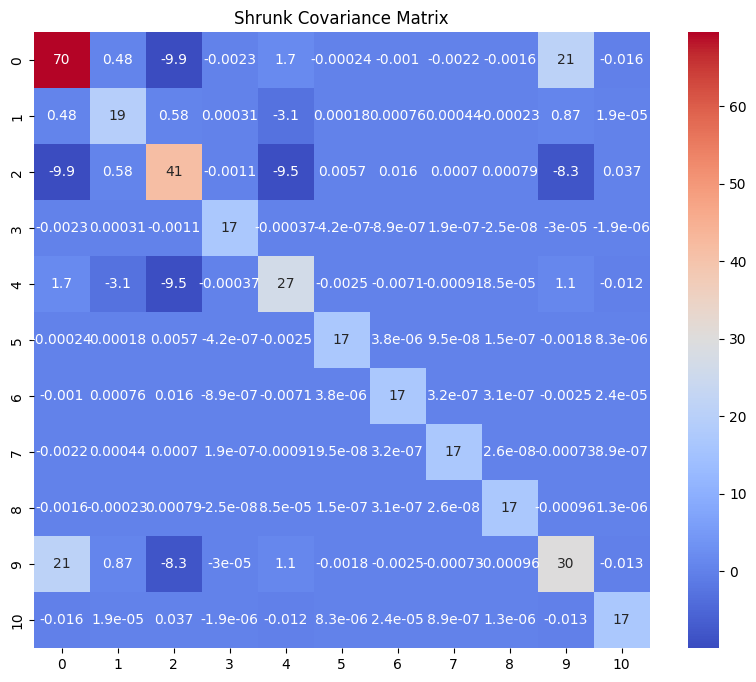

In [314]:
# Plot the shrunk covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Shrunk Covariance Matrix')
plt.show()

In [325]:
# Apply Newey-West correction
nw_correction = factor_covariance_matrix.ewm(span=500).cov().reset_index()
nw_correction = nw_correction.drop(["level_0", "level_1"], axis = 1).fillna(0)

In [326]:
nw_correction

,20-Day ADV,Growth,Volatility,Profitability,Dividend Yield,Value,Market Sensitivity,Medium-Term Momentum,Short-Term Momentum,Liquidity
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
1,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
2,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
3,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
4,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...
95,-0.000985,0.000611,0.019299,-1.410957e-06,-0.008507,5.224998e-06,0.000013,3.304808e-07,5.071592e-07,-0.006282
96,-0.004235,0.002502,0.054821,-2.946924e-06,-0.024233,1.305480e-05,0.000039,1.143731e-06,1.063995e-06,-0.009073
97,-0.007273,0.001506,0.002418,6.137331e-07,-0.003088,3.304808e-07,0.000001,6.475580e-07,8.202958e-08,-0.002392
98,-0.005411,-0.000770,0.002705,-9.964621e-08,0.000304,5.071592e-07,0.000001,8.202958e-08,2.999961e-07,-0.003258
